# German Credit Data

In [ ]:
!pip install ucimlrepo -q

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# metadata
print(statlog_german_credit_data.metadata)

# variable information
print(statlog_german_credit_data.variables)

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=107)

In [ ]:
X_train_num = X_train.select_dtypes('number')
X_test_num = X_test.select_dtypes('number')

X_train_cat = X_train.select_dtypes('object')
X_test_cat = X_test.select_dtypes('object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

encoder = LabelEncoder()
for col in X_train_cat.columns:
    X_train_cat[col] = encoder.fit_transform(X_train_cat[col])
    X_test_cat[col] = encoder.transform(X_test_cat[col])

X_train_encoded = pd.concat([X_train_num, X_train_cat], axis = 1)
X_test_encoded = pd.concat([X_test_num, X_test_cat], axis = 1)

In [ ]:
y.value_counts()

,count
class,
1,700
2,300


In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

class
1        560
2        240
Name: count, dtype: int64
class
1        140
2         60
Name: count, dtype: int64


# NN With Pytorch

In [ ]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

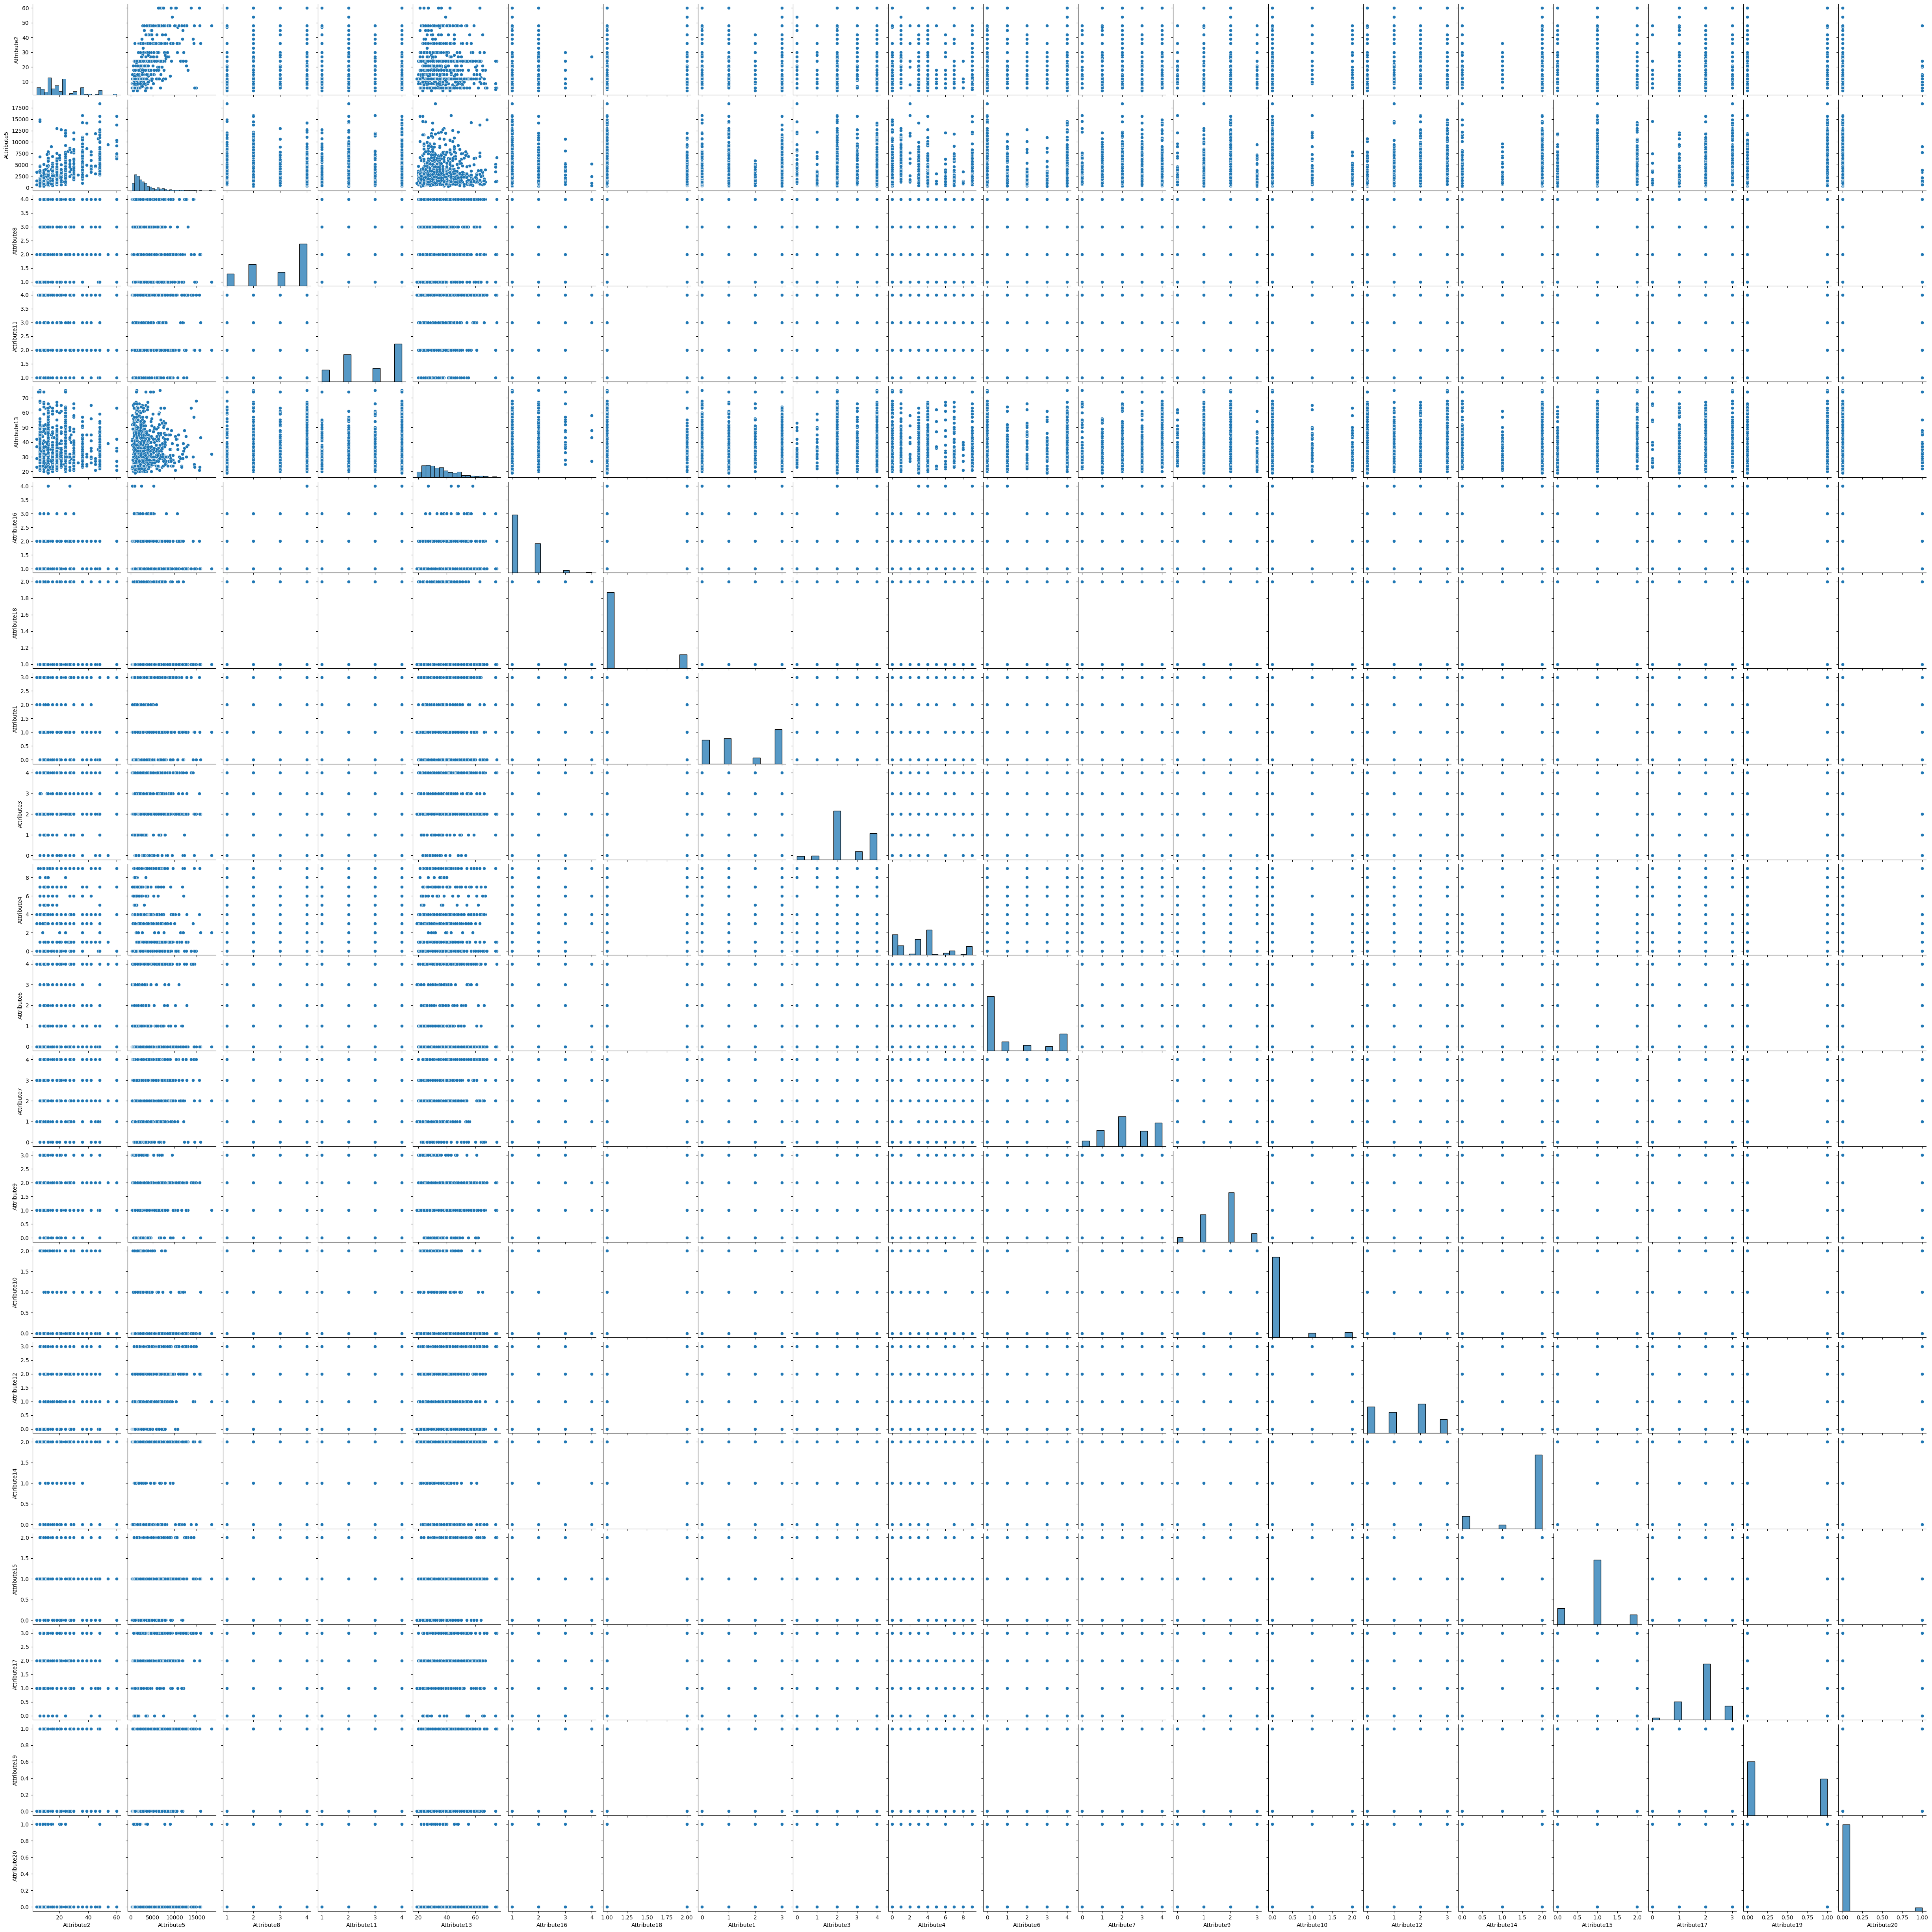

In [ ]:
sns.pairplot(X_train)

In [ ]:
m_scaler = MinMaxScaler()
X_train_scaled = m_scaler.fit_transform(X_train_encoded)
X_test_scaled = m_scaler.transform(X_test_encoded)

In [ ]:
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
X_train_scaled = m_scaler.fit_transform(X_train)
X_test_scaled = m_scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[0.38235294, 0.23550127, 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.29411765, 0.07131066, 1.        , ..., 0.33333333, 0.        ,
        0.        ],
       [0.25      , 0.11384395, 0.33333333, ..., 0.66666667, 0.        ,
        0.        ],
       ...,
       [0.02941176, 0.05436338, 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.11764706, 0.12804006, 0.33333333, ..., 0.66666667, 0.        ,
        0.        ],
       [0.47058824, 0.09370529, 1.        , ..., 1.        , 1.        ,
        0.        ]])

In [ ]:
X_train_scaled = torch.FloatTensor(X_train_scaled)
X_test_scaled = torch.FloatTensor(X_test_scaled)
y_train = torch.LongTensor(y_train).squeeze()
y_test = torch.LongTensor(y_test).squeeze()

In [ ]:
class Model(nn.Module):
  def __init__(self, input=20, h1=10, h2=11, h3=5, output=2):
    super().__init__()
    self.fc1 = nn.Linear(input, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, h3)
    self.out = nn.Linear(h3, output)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.out(x)

    return x

In [ ]:
torch.manual_seed(4)
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0125, weight_decay=1e-2)

epochs = 300
losses = []
for epoch in range(epochs+1):
  model.train()

  optimizer.zero_grad()
  y_pred = model(X_train_scaled)
  loss = criterion(y_pred, y_train)

  loss.backward()
  optimizer.step()

  losses.append(loss.detach().numpy())

  if epoch % 10 == 0:
    print(f'Epoch: {epoch+1}, Loss: {loss.item():.4f}')

Epoch: 1, Loss: 0.7197
Epoch: 11, Loss: 0.6101
Epoch: 21, Loss: 0.5983
Epoch: 31, Loss: 0.5821
Epoch: 41, Loss: 0.5350
Epoch: 51, Loss: 0.4976
Epoch: 61, Loss: 0.4842
Epoch: 71, Loss: 0.4831
Epoch: 81, Loss: 0.4825
Epoch: 91, Loss: 0.4825
Epoch: 101, Loss: 0.4814
Epoch: 111, Loss: 0.4804
Epoch: 121, Loss: 0.4744
Epoch: 131, Loss: 0.4712
Epoch: 141, Loss: 0.4691
Epoch: 151, Loss: 0.4671
Epoch: 161, Loss: 0.4647
Epoch: 171, Loss: 0.4632
Epoch: 181, Loss: 0.4609
Epoch: 191, Loss: 0.4603
Epoch: 201, Loss: 0.4590
Epoch: 211, Loss: 0.4581
Epoch: 221, Loss: 0.4576
Epoch: 231, Loss: 0.4573
Epoch: 241, Loss: 0.4570
Epoch: 251, Loss: 0.4569
Epoch: 261, Loss: 0.4572
Epoch: 271, Loss: 0.4569
Epoch: 281, Loss: 0.4574
Epoch: 291, Loss: 0.4572
Epoch: 301, Loss: 0.4575


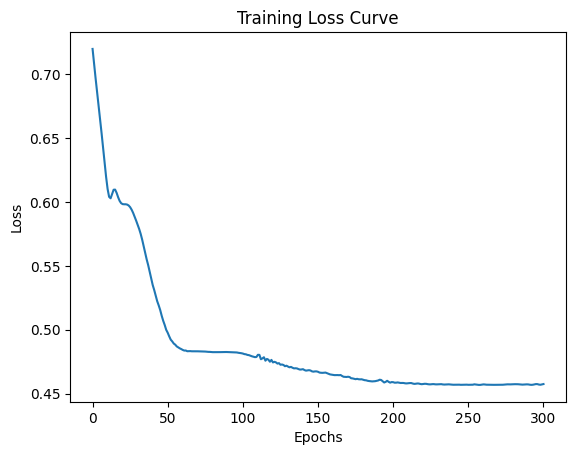

In [ ]:
plt.plot(range(epochs+1), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

In [ ]:
with torch.no_grad():
  model.eval()
  y_eval = model.forward(X_test_scaled)
  test_loss_value = criterion(y_eval, y_test)

test_loss_value

tensor(0.4676)

In [ ]:
dl_accuracy = 0

with torch.no_grad():
    model.eval()
    total_correct = 0
    total_samples = len(y_test)

    #create the evaluation loop
    y_eval = model.forward(X_test_scaled)
    _, predicted = torch.max(y_eval, 1)
    total_correct = (predicted == y_test).sum().item()

    #calculate accuracy
    dl_accuracy = total_correct / total_samples
    dl_accuracy_pct = f'{dl_accuracy * 100:.2f}%'

    print(f'Test Accuracy: {dl_accuracy}')
    print(f'Percentage of Test Accuracy: {dl_accuracy_pct}')

Test Accuracy: 0.8
Percentage of Test Accuracy: 80.00%


# NN WIth Tensorflow

In [ ]:
import tensorflow as tf
import keras
from keras import layers, models, optimizers, losses

In [ ]:
tf.random.set_seed(17)
model = models.Sequential([
    layers.Input(shape=(20,)),
    layers.Dense(20, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # h1 = 10
    layers.Dropout(0.1),
    layers.Dense(11, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # h2 = 11
    layers.Dropout(0.2),
    layers.Dense(5, activation='relu'),
    layers.Dense(2),
])

In [ ]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.01, decay=1e-2),
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
X_train_scaled = X_train_scaled.numpy()
X_test_scaled = X_test_scaled.numpy()
y_train = y_train.numpy()
y_test = y_test.numpy()

if X_train_scaled.shape[1] != 20:
  X_train_scaled = X_train_scaled.reshape(-1, 20)

if X_test_scaled.shape[1] != 20:
  X_test_scaled = X_test_scaled.reshape(-1, 20)

In [ ]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=32,
    verbose=1,
    validation_data=(X_test_scaled, y_test),
)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7457 - loss: 0.5286 - val_accuracy: 0.7550 - val_loss: 0.5496
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7467 - loss: 0.5254 - val_accuracy: 0.7650 - val_loss: 0.5397
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7654 - loss: 0.5080 - val_accuracy: 0.7200 - val_loss: 0.5689
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7303 - loss: 0.5346 - val_accuracy: 0.7800 - val_loss: 0.5196
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7550 - loss: 0.5213 - val_accuracy: 0.7600 - val_loss: 0.5230
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7539 - loss: 0.5215 - val_accuracy: 0.7850 - val_loss: 0.5219
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7517 - loss: 0.5156 - val_accuracy: 0.7800 - val_loss: 0.5243
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7560 - loss: 0.5212 - val_accuracy: 0.77

In [ ]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

7/7 - 0s - 12ms/step - accuracy: 0.7650 - loss: 0.5276
Test accuracy: 0.7649999856948853
Test loss: 0.5275718569755554


# Traditional Machine Learning
##(Logisitic Regression, Random Forest, SVM)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=107)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_encoded_scaled = scaler.transform(X_test_encoded)

In [ ]:
y_train_resampled = y_train_resampled.values.ravel()

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', max_iter = 200, random_state = 17),
    "Random Forest": RandomForestClassifier(max_depth = 3, class_weight='balanced', random_state = 17),
    "Support Vector Machine": SVC(C=0.01, kernel='linear',class_weight='balanced', random_state = 17)
}


for name, model in models.items():
    model.fit(X_train_resampled_scaled, y_train_resampled)

    y_train_pred = model.predict(X_train_resampled_scaled)
    train_acc = accuracy_score(y_train_resampled, y_train_pred)

    y_test_pred = model.predict(X_test_encoded_scaled)
    test_acc = accuracy_score(y_test, y_test_pred)

    cm = confusion_matrix(y_test, y_test_pred)
    cr = classification_report(y_test, y_test_pred)

    print(f'- {name}')
    print(f"Training Accuracy = {train_acc:.4f}, Testing Accuracy = {test_acc:.4f} \n -- confusion matrix \n {cm} \n -- classification report \n {cr}")
    print('======================================================')

- Logistic Regression
Training Accuracy = 0.7991, Testing Accuracy = 0.7600 
 -- confusion matrix 
 [[112  28]
 [ 20  40]] 
 -- classification report 
               precision    recall  f1-score   support

           1       0.85      0.80      0.82       140
           2       0.59      0.67      0.62        60

    accuracy                           0.76       200
   macro avg       0.72      0.73      0.72       200
weighted avg       0.77      0.76      0.76       200

- Random Forest
Training Accuracy = 0.7911, Testing Accuracy = 0.7500 
 -- confusion matrix 
 [[106  34]
 [ 16  44]] 
 -- classification report 
               precision    recall  f1-score   support

           1       0.87      0.76      0.81       140
           2       0.56      0.73      0.64        60

    accuracy                           0.75       200
   macro avg       0.72      0.75      0.72       200
weighted avg       0.78      0.75      0.76       200

- Support Vector Machine
Training Accuracy = 0.7